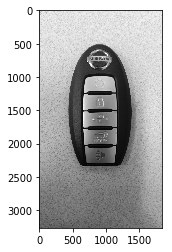

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/elurz/Documents/GitHub/AiContinental/FobsPictures"

CATEGORIES = ["Nissan", "Acura"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR, category) #create path to Nissan And Acura
    for img in os.listdir(path): # iterate over each image per Nissan And Acura
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_new = cv2.medianBlur(img_array,9)
        plt.imshow(img_new, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now 
    break  #...and one more!
        

In [9]:
print(img_array.shape)

(3264, 1836)


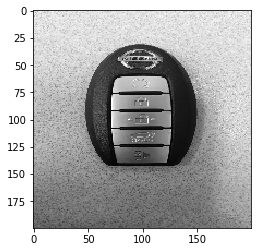

In [10]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

In [11]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do nissan and acura

        path = os.path.join(DATADIR,category)  # create path to nissan and acura
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=nissan 1=acura

        for img in tqdm(os.listdir(path)):  # iterate over each image per Nissan And Acura
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:25<00:00, 19.93it/s]


1000


In [12]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
0
0
0
1
0
0


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[240]
   [239]
   [237]
   ...
   [234]
   [215]
   [210]]

  [[240]
   [237]
   [249]
   ...
   [232]
   [222]
   [228]]

  [[240]
   [236]
   [230]
   ...
   [233]
   [235]
   [229]]

  ...

  [[175]
   [176]
   [176]
   ...
   [155]
   [153]
   [146]]

  [[186]
   [174]
   [180]
   ...
   [162]
   [161]
   [151]]

  [[181]
   [182]
   [182]
   ...
   [136]
   [157]
   [158]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
print(X[0][0])

[[240]
 [239]
 [237]
 [235]
 [240]
 [239]
 [246]
 [235]
 [236]
 [236]
 [233]
 [230]
 [237]
 [244]
 [244]
 [238]
 [234]
 [231]
 [229]
 [245]
 [249]
 [235]
 [226]
 [236]
 [245]
 [243]
 [241]
 [229]
 [239]
 [242]
 [243]
 [246]
 [251]
 [248]
 [241]
 [246]
 [247]
 [244]
 [253]
 [244]
 [239]
 [240]
 [222]
 [231]
 [239]
 [235]
 [239]
 [243]
 [232]
 [234]
 [233]
 [237]
 [222]
 [233]
 [240]
 [245]
 [238]
 [229]
 [238]
 [238]
 [241]
 [243]
 [239]
 [236]
 [227]
 [227]
 [228]
 [225]
 [231]
 [240]
 [241]
 [233]
 [227]
 [235]
 [231]
 [228]
 [232]
 [208]
 [212]
 [234]
 [232]
 [238]
 [237]
 [242]
 [232]
 [233]
 [235]
 [230]
 [237]
 [236]
 [233]
 [234]
 [242]
 [233]
 [219]
 [232]
 [236]
 [235]
 [232]
 [224]
 [239]
 [231]
 [238]
 [222]
 [236]
 [244]
 [237]
 [239]
 [242]
 [235]
 [229]
 [225]
 [225]
 [227]
 [226]
 [240]
 [241]
 [244]
 [232]
 [230]
 [235]
 [229]
 [222]
 [227]
 [240]
 [234]
 [231]
 [236]
 [244]
 [233]
 [227]
 [231]
 [233]
 [227]
 [237]
 [244]
 [239]
 [241]
 [239]
 [239]
 [235]
 [241]
 [222]

In [18]:
X = X/255.0

In [19]:
print(X[0][0])

[[0.94117647]
 [0.9372549 ]
 [0.92941176]
 [0.92156863]
 [0.94117647]
 [0.9372549 ]
 [0.96470588]
 [0.92156863]
 [0.9254902 ]
 [0.9254902 ]
 [0.91372549]
 [0.90196078]
 [0.92941176]
 [0.95686275]
 [0.95686275]
 [0.93333333]
 [0.91764706]
 [0.90588235]
 [0.89803922]
 [0.96078431]
 [0.97647059]
 [0.92156863]
 [0.88627451]
 [0.9254902 ]
 [0.96078431]
 [0.95294118]
 [0.94509804]
 [0.89803922]
 [0.9372549 ]
 [0.94901961]
 [0.95294118]
 [0.96470588]
 [0.98431373]
 [0.97254902]
 [0.94509804]
 [0.96470588]
 [0.96862745]
 [0.95686275]
 [0.99215686]
 [0.95686275]
 [0.9372549 ]
 [0.94117647]
 [0.87058824]
 [0.90588235]
 [0.9372549 ]
 [0.92156863]
 [0.9372549 ]
 [0.95294118]
 [0.90980392]
 [0.91764706]
 [0.91372549]
 [0.92941176]
 [0.87058824]
 [0.91372549]
 [0.94117647]
 [0.96078431]
 [0.93333333]
 [0.89803922]
 [0.93333333]
 [0.93333333]
 [0.94509804]
 [0.95294118]
 [0.9372549 ]
 [0.9254902 ]
 [0.89019608]
 [0.89019608]
 [0.89411765]
 [0.88235294]
 [0.90588235]
 [0.94117647]
 [0.94509804]
 [0.91